# Performance of nonoptimized models

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
X_train = pd.read_csv('..\data_files\X_train.csv').drop('Unnamed: 0', axis=1)
y_train = pd.read_csv('..\data_files\y_train.csv').drop('Unnamed: 0', axis=1)
X_test = pd.read_csv('..\data_files\X_test.csv').drop('Unnamed: 0', axis=1)
y_test = pd.read_csv('..\data_files\y_test.csv').drop('Unnamed: 0', axis=1)

In [3]:
models_dict = {}
model_names = ['ridge','mlpregressor','randomforestregressor','xgbregressor']

for i, path in enumerate(model_names):
    file = open(f'../models/pickled/base_{path}.pickle', 'rb')
    model = pickle.load(file)
    file.close()
    models_dict[model_names[i]] = model

In [6]:
results = {}

for model in models_dict:
    r2_train = round(r2_score(y_train, models_dict[model].predict(X_train)), 4)
    r2_test = round(r2_score(y_test, models_dict[model].predict(X_test)), 4)
    mse_train = round(mean_squared_error(y_train, models_dict[model].predict(X_train)))
    mse_test = round(mean_squared_error(y_test, models_dict[model].predict(X_test)))
    results[model] = [r2_train, r2_test, mse_train, mse_test]

results_frame = pd.DataFrame(data=results).transpose()
results_frame.columns = ['R2_score_train', 'R2_score_test', 'MSE_train', 'MSE_test']
results_frame

,R2_score_train,R2_score_test,MSE_train,MSE_test
ridge,0.6672,0.6734,2.411401e+09,2.284558e+09
mlpregressor,0.6811,0.6884,2.310537e+09,2.179176e+09
randomforestregressor,0.9024,0.8708,7.071168e+08,9.036851e+08
xgbregressor,0.9446,0.8941,4.017530e+08,7.404561e+08


Text(0.5, 1.0, 'R2 score on seen and unseen data')

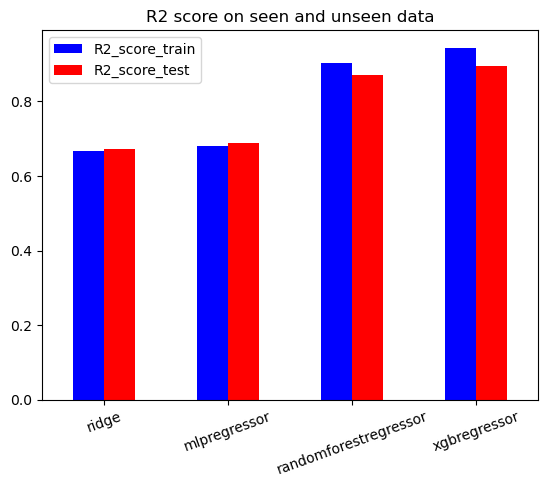

In [16]:
results_frame[['R2_score_train','R2_score_test']].plot(kind='bar', colormap='bwr', rot=20)
plt.title("R2 score on seen and unseen data")

Text(0.5, 1.0, 'Mean squared error on seen and unseen data')

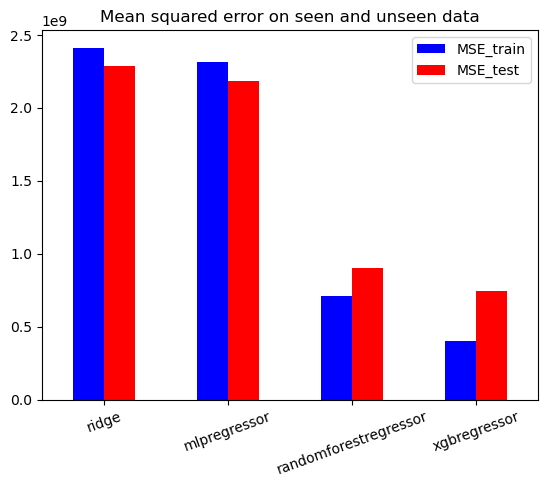

In [18]:
results_frame[['MSE_train','MSE_test']].plot(kind='bar', colormap='bwr', rot=20)
plt.title("Mean squared error on seen and unseen data")

Random forest and XGBoost models seem to be pretty accurate, but also a bit overfitted. We can possibly eliminate overfitting by tuning hyperparameters with GridSearchCV.